In [39]:
import pandas as pd
import seaborn as sns 

In [2]:
data_train= pd.read_csv("train.csv")
data_test= pd.read_csv("test.csv")

In [3]:
data_train.head()
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


UNDERSTANDİNG THE DATASET

In [4]:
print("The shape of train set: ",data_train.shape)
print("The shape of test set: ",data_test.shape)

The shape of train set:  (1460, 81)
The shape of test set:  (1459, 80)


In [5]:
data_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
...,...,...,...,...,...,...,...,...
PoolArea,1460.0,2.758904,40.177307,0.0,0.00,0.0,0.00,738.0
MiscVal,1460.0,43.489041,496.123024,0.0,0.00,0.0,0.00,15500.0
MoSold,1460.0,6.321918,2.703626,1.0,5.00,6.0,8.00,12.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.00,2008.0,2009.00,2010.0


Data Preprocessing

In [8]:
data_train.set_index("Id",inplace=True)
data_test.set_index("Id",inplace=True)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Handling Missing Data

In [9]:
data_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


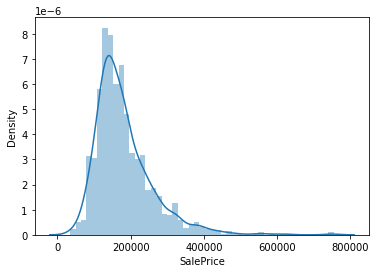

In [51]:
sns.distplot(data_train.SalePrice, kde = True);

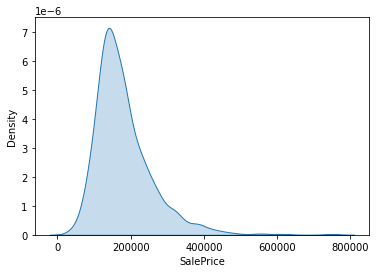

In [52]:
sns.kdeplot(data_train.SalePrice, shade = True);

In [11]:
cols_with_null=data_train.isnull().sum().sort_values(ascending=False)
cols_with_null.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [12]:
print("Total number of missing data in the dataset:",data_train.isnull().sum().sum())

Total number of missing data in the dataset: 6965


In [14]:
data_train["SalePrice"].isnull().sum()

0

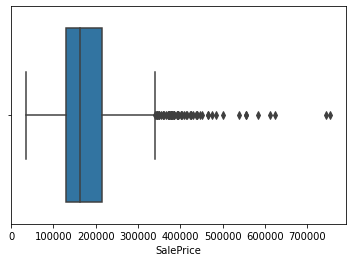

In [57]:
sns.boxplot(x = data_train["SalePrice"]);

In [15]:
cols_to_drop=(cols_with_null.head(6).index).tolist()
data_train.drop(cols_to_drop,axis=1,inplace=True)
data_test.drop(cols_to_drop,axis=1,inplace=True)

Creating The Target And Feature Variables

In [17]:
y=data_train.SalePrice
X=data_train.drop(["SalePrice"],axis=1)

Splitting The Dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,random_state=0)

Handling the categorical and numerical columns

Data preprocessing is different for categorical and numeric columns. Let's select categorical and numeric columns. I'm going to remove columns with more than ten subcategories.

In [20]:
categorical_cols=[cname for cname in X_train.columns 
                  if X_train[cname].nunique()<10 and X_train[cname].dtype == "object"]

In [21]:
numerical_cols=[cname for cname in X_train.columns 
                if X_train[cname].dtype in ["int64", "float64"]]

In [22]:
print("The Number Of Categorical Columns",len(categorical_cols))
print("The Number Of Numerical Columns",len(numerical_cols))

The Number Of Categorical Columns 35
The Number Of Numerical Columns 35


We've selected 70(=35+35) columns. Let's remove any other columns we didn't select from the datasets.

In [24]:
my_cols=categorical_cols+numerical_cols
X_train=X_train[my_cols]
X_val=X_val[my_cols]
X_test=data_test[my_cols]

Pipelines for data preprocessing

A machine learning pipeline allows us to combine a series of steps involved in training a model. Let's import the necessary libraries to build the pipelines

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
numerical_transformer = Pipeline(steps=[
    ("imputer_num", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [27]:
categorical_transformer = Pipeline(steps = [
    ("imputer_cal", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [28]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

Model Building

Random forests is an ensemble learning method used for classification and regression. Let's build a simple random forest model.

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0)

In [30]:
my_pipeline=Pipeline(steps=[("preprocessor",preprocessor),("model",rf)])

In [31]:
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
          

Model Evaluation

In [32]:
val_preds=my_pipeline.predict(X_val)

In [33]:
from sklearn.metrics import mean_absolute_error
print("Validation MAE: ", mean_absolute_error(y_val, val_preds))

Validation MAE:  17721.242602739727


Cross-Validation

Cross-validation is a resampling method that allows us to use different portions of the data to test and train a model on different iterations. Let's find the cross validation score with the cross_val_score function and calculate the mean of cross validation scores with the mean method.

In [34]:
from sklearn.model_selection import cross_val_score
scores = -1 * cross_val_score(my_pipeline, X,y, cv = 5, scoring="neg_mean_absolute_error")
print("Mean Cross Validation Score: ", scores.mean())

Mean Cross Validation Score:  17568.15694520548


Grid Search

The grid search allows us to generate candidates from the grid of parameter values specified by the param_grid parameter. Let's find the best hyperparameters of random forest model with the GridSearchCV class.

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'model__n_estimators': [500, 600, 700],
    'model__max_features': ['auto','sqrt','log2'],
    'model__max_depth' : [5,6,7],
    'model__criterion' :['squared_error','absolute_error','poisson']}
GridCV = GridSearchCV(my_pipeline, param_grid, n_jobs= -1)
GridCV.fit(X_train,y_train)  
print(GridCV.best_params_)    
print(GridCV.best_score_)

{'model__criterion': 'squared_error', 'model__max_depth': 7, 'model__max_features': 'auto', 'model__n_estimators': 500}
0.851573621723715


In [36]:
preds_test = GridCV.predict(X_test)

In [37]:
output = pd.DataFrame({'Id': X_test.index, 'SalePrice': preds_test})
output.head()

,Id,SalePrice
0,1461,125762.249652
1,1462,151586.396654
2,1463,181441.565045
3,1464,181278.359674
4,1465,204940.884297


In [38]:
output.to_csv('submission.csv', index=False)

In [59]:
update_data=pd.read_csv("submission.csv")

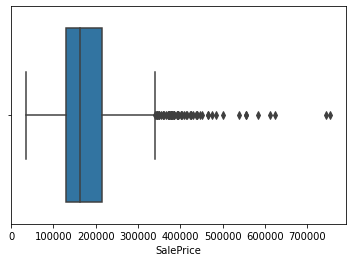

In [60]:
sns.boxplot(x = data_train["SalePrice"]);

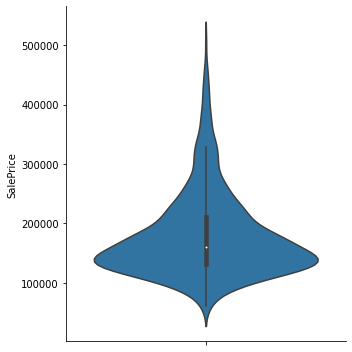

In [61]:
sns.catplot(y = "SalePrice", kind = "violin", data = update_data);